In [1]:
from roadvision3d.src.datasets.rope3d import Rope3D
import yaml

from roadvision3d.src.datasets.kitti_utils import Object3d
import numpy as np

import matplotlib.pyplot as plt
from visualizer import draw_2d_bboxes, draw_3d_bboxes


%load_ext autoreload
%autoreload 2

In [2]:
cfg_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/rope3d.yaml'
cfg = yaml.load(open(cfg_path, 'r'), Loader=yaml.Loader)

# train_loader, val_loader, test_loader = build_dataloader(cfg['dataset'])
# dataset = KITTI(split='trainval', cfg=cfg['dataset'])
rope3d_dataset = Rope3D(split='trainval', cfg=cfg['dataset'])

Resolution init: [1920 1088]


In [3]:
print(rope3d_dataset.data_dir)
print(rope3d_dataset.image_dir)
print(rope3d_dataset.label_dir)
print(rope3d_dataset.calib_dir)

/home/javier/datasets/rope3d-backup/training
/home/javier/datasets/rope3d-backup/training/image_2
/home/javier/datasets/rope3d-backup/training/label_2
/home/javier/datasets/rope3d-backup/training/calib


In [19]:
id_num = 6

id = rope3d_dataset.idx_list[id_num]
print("First item:", id)

First item: 1632_fa2sd4a11North151_420_1613724070_1613731267_183_obstacle


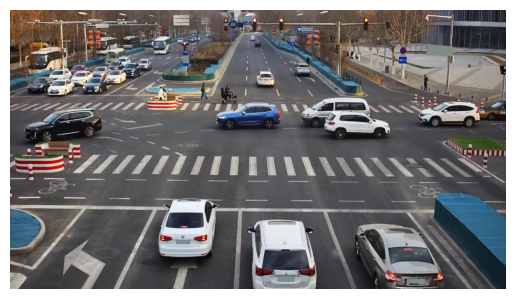

In [20]:
img = rope3d_dataset.get_image(id)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis for better visualization
plt.show()

In [21]:
calib = rope3d_dataset.get_calib(id)
print(calib.P2)
print(calib.R0)
print(calib.V2C)
print(calib.C2V)


[[2.18337502e+03 0.00000000e+00 9.40590363e+02 0.00000000e+00]
 [0.00000000e+00 2.32929733e+03 5.67568513e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [22]:
labels = rope3d_dataset.get_label(id)

print(labels)

[car 0.000 0.000 -1.455 box2d: [572.5044 729.9359 801.9567 967.0294] hwl: [0.621 1.558 4.238] pos: [-2.1848772  2.5884616 19.866165 ] ry: -1.564, car 0.000 0.000 1.921 box2d: [142.04291 265.57898 250.35414 334.4967 ] hwl: [1.301 1.344 4.271] pos: [-20.205475   -6.2197623  59.571354 ] ry: 1.594, trafficcone 0.000 0.000 0.489 box2d: [ 69.154106 598.5621    91.05388  658.22064 ] hwl: [0.666 0.232 0.108] pos: [-10.856403    1.0440178  27.623486 ] ry: 0.115, car 0.000 1.000 1.953 box2d: [ 65.93524 257.7037  186.19931 325.16818] hwl: [1.353 1.651 4.294] pos: [-23.10687   -6.730973  62.2546  ] ry: 1.597, trafficcone 0.000 1.000 0.003 box2d: [615.2385  306.16907 622.46106 333.01352] hwl: [0.616 0.326 0.164] pos: [-8.381407  -5.7554793 56.94783  ] ry: -0.144, trafficcone 0.000 0.000 -0.389 box2d: [1769.3435  519.241  1790.8595  570.8733] hwl: [0.683 0.297 0.152] pos: [1.2681812e+01 1.3694027e-02 3.3058292e+01] ry: -0.023, van 0.000 1.000 2.888 box2d: [1126.4999   336.1567  1395.4095   459.38928

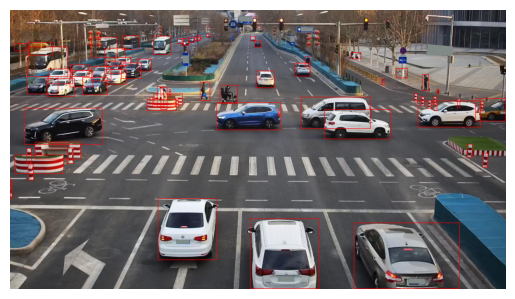

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x7F88C3F47760>


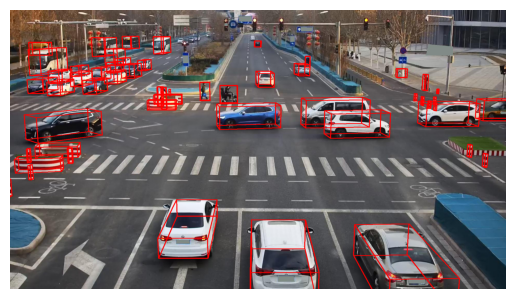

In [23]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, labels)

img_3d = img.copy()
print(img_3d)
draw_3d_bboxes(img_3d, labels, calib, 0.20)